#**TRAFIC PREDICTION USING MACHINE LEARNING MODELS**🚦📈

---




###**Importing Basic Modules**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### **Dataset Modification**
**Added Columns:**
1. **Weather:**
   - Categorized weather conditions based on the time of day.
   - Weather categories include "Sunny", "Neutral", and "Foggy" depending on the time of the observation.
   
2. **Is Peak Hour:**
   - Binary indicator to identify peak hours.
   - True if the observation time falls within peak traffic hours (6-10 AM and 3-9 PM), otherwise False.




In [2]:
# Read the dataset
df = pd.read_csv("TrafficTwoMonth.csv")

# Function to determine weather
def get_weather(row):
    hour = pd.to_datetime(row["Time"]).hour
    if 8 <= hour < 15:
        return "Sunny"
    elif 15 <= hour < 18:
        return "Neutral"
    elif 1 <= hour < 5:
        return "Foggy"
    else:
        return "Neutral"

# Function to determine peak hour
def is_peak_hour(row):
    hour = pd.to_datetime(row["Time"]).hour
    if (15 <= hour < 21) or (6 <= hour < 10):
        return True
    else:
        return False

# Apply functions to create new columns
df["Weather"] = df.apply(get_weather, axis=1)
df["Is Peak Hour"] = df.apply(is_peak_hour, axis=1)

# Save the modified dataset
df.to_csv("modified_dataset.csv", index=False)


In [3]:
# Read the dataset
df = pd.read_csv("modified_dataset.csv")

In [4]:
df.shape

(5952, 11)

In [5]:
df.describe()

,Date,CarCount,BikeCount,BusCount,TruckCount,Total
count,5952.000000,5952.000000,5952.000000,5952.000000,5952.000000,5952.000000
mean,16.000000,65.440692,12.161458,12.912970,18.646337,109.161458
std,8.945023,44.749335,11.537944,12.497736,10.973139,55.996312
min,1.000000,5.000000,0.000000,0.000000,0.000000,21.000000
25%,8.000000,18.750000,3.000000,2.000000,10.000000,54.000000
50%,16.000000,62.000000,9.000000,10.000000,18.000000,104.000000
75%,24.000000,103.000000,19.000000,20.000000,27.000000,153.000000
max,31.000000,180.000000,70.000000,50.000000,60.000000,279.000000


In [6]:
# Display distinct values under each column
for column in df.columns:
    distinct_values = df[column].unique()
    print(f"Distinct values under column '{column}':")
    print(distinct_values)
    print()

Distinct values under column 'Time':
['12:00:00 AM' '12:15:00 AM' '12:30:00 AM' '12:45:00 AM' '1:00:00 AM'
 '1:15:00 AM' '1:30:00 AM' '1:45:00 AM' '2:00:00 AM' '2:15:00 AM'
 '2:30:00 AM' '2:45:00 AM' '3:00:00 AM' '3:15:00 AM' '3:30:00 AM'
 '3:45:00 AM' '4:00:00 AM' '4:15:00 AM' '4:30:00 AM' '4:45:00 AM'
 '5:00:00 AM' '5:15:00 AM' '5:30:00 AM' '5:45:00 AM' '6:00:00 AM'
 '6:15:00 AM' '6:30:00 AM' '6:45:00 AM' '7:00:00 AM' '7:15:00 AM'
 '7:30:00 AM' '7:45:00 AM' '8:00:00 AM' '8:15:00 AM' '8:30:00 AM'
 '8:45:00 AM' '9:00:00 AM' '9:15:00 AM' '9:30:00 AM' '9:45:00 AM'
 '10:00:00 AM' '10:15:00 AM' '10:30:00 AM' '10:45:00 AM' '11:00:00 AM'
 '11:15:00 AM' '11:30:00 AM' '11:45:00 AM' '12:00:00 PM' '12:15:00 PM'
 '12:30:00 PM' '12:45:00 PM' '1:00:00 PM' '1:15:00 PM' '1:30:00 PM'
 '1:45:00 PM' '2:00:00 PM' '2:15:00 PM' '2:30:00 PM' '2:45:00 PM'
 '3:00:00 PM' '3:15:00 PM' '3:30:00 PM' '3:45:00 PM' '4:00:00 PM'
 '4:15:00 PM' '4:30:00 PM' '4:45:00 PM' '5:00:00 PM' '5:15:00 PM'
 '5:30:00 PM' '5:45:00 

In [9]:
print(df.dtypes)

Time                 object
Date                  int64
Day of the week      object
CarCount              int64
BikeCount             int64
BusCount              int64
TruckCount            int64
Total                 int64
Traffic Situation    object
Weather              object
Is Peak Hour           bool
dtype: object


In [8]:
# Convert 'Time' column to datetime format
df['Time'] = pd.to_datetime(df['Time'])

# Check the data type of the 'Time' column after conversion
print(df['Time'].dtype)

# Extract the time component
df['Time'] = df['Time'].dt.time

datetime64[ns]


C:\Users\raksh\AppData\Local\Temp\ipykernel_13720\2747856985.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time'])


In [11]:
df

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,Weather,Is Peak Hour
0,00:00:00,10,Tuesday,13,2,2,24,41,normal,Neutral,False
1,00:15:00,10,Tuesday,14,1,1,36,52,normal,Neutral,False
2,00:30:00,10,Tuesday,10,2,2,32,46,normal,Neutral,False
3,00:45:00,10,Tuesday,10,2,2,36,50,normal,Neutral,False
4,01:00:00,10,Tuesday,11,2,1,34,48,normal,Foggy,False
...,...,...,...,...,...,...,...,...,...,...,...
5947,22:45:00,9,Thursday,16,3,1,36,56,normal,Neutral,False
5948,23:00:00,9,Thursday,11,0,1,30,42,normal,Neutral,False
5949,23:15:00,9,Thursday,15,4,1,25,45,normal,Neutral,False
5950,23:30:00,9,Thursday,16,5,0,27,48,normal,Neutral,False


### **Dataset Analysis**



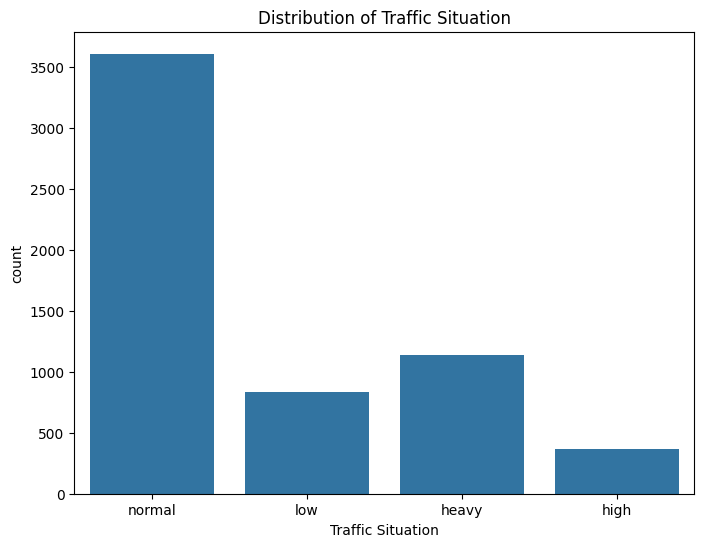

In [12]:
# Visualize the distribution of the target variable 'Traffic Situation'
plt.figure(figsize=(8, 6))
sns.countplot(x='Traffic Situation', data=df)
plt.title('Distribution of Traffic Situation')
plt.show()

# We have more count of "Normal" traffic situation in our dataset

The graph illustrates the distribution of various traffic situations in a dataset, with "normal" having the highest count of over 3500 occurrences, indicating its prevalence in the dataset.

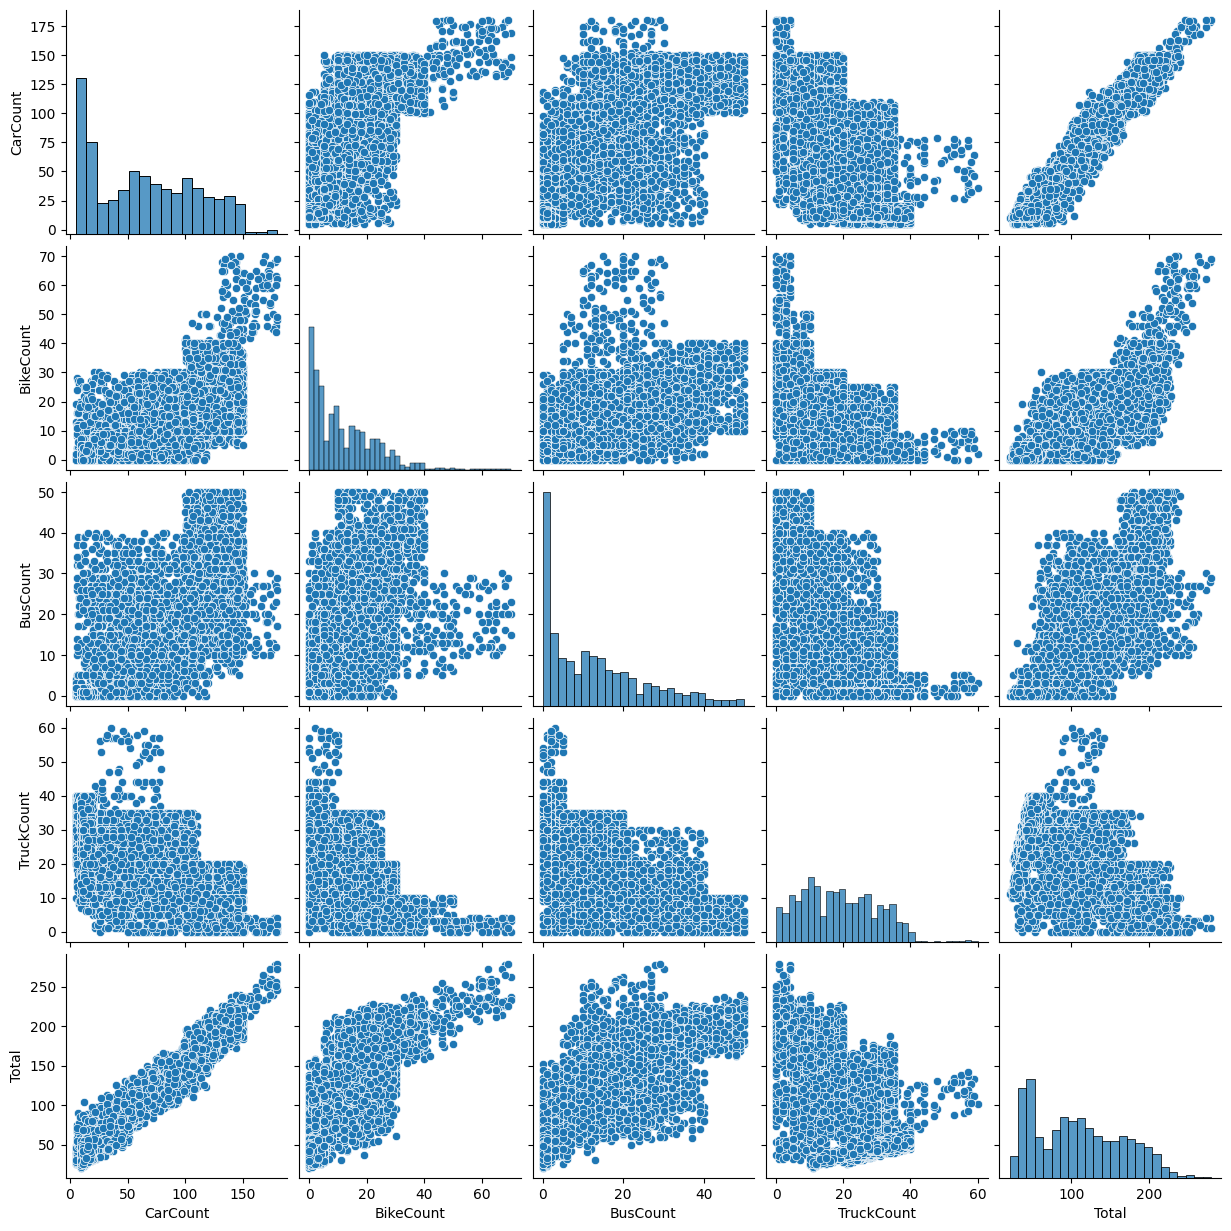

In [ ]:
# Pairplot
sns.pairplot(df[['CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Total']])
plt.show()

The pair plot represents the relationships between variables 'CarCount', 'BikeCount', 'BusCount', 'TruckCount', and 'Total' through histograms and scatter plots, highlighting the distributions and correlations among them.

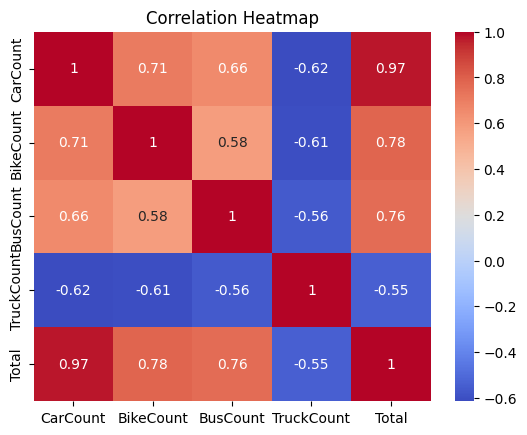

In [ ]:
correlation_matrix = df[['CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Total']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

The heatmap visualizes the correlation matrix between variables such as 'CarCount', 'BikeCount', 'BusCount', 'TruckCount', and 'Total', with each cell representing the correlation coefficient and color indicating the strength and direction of the correlation.

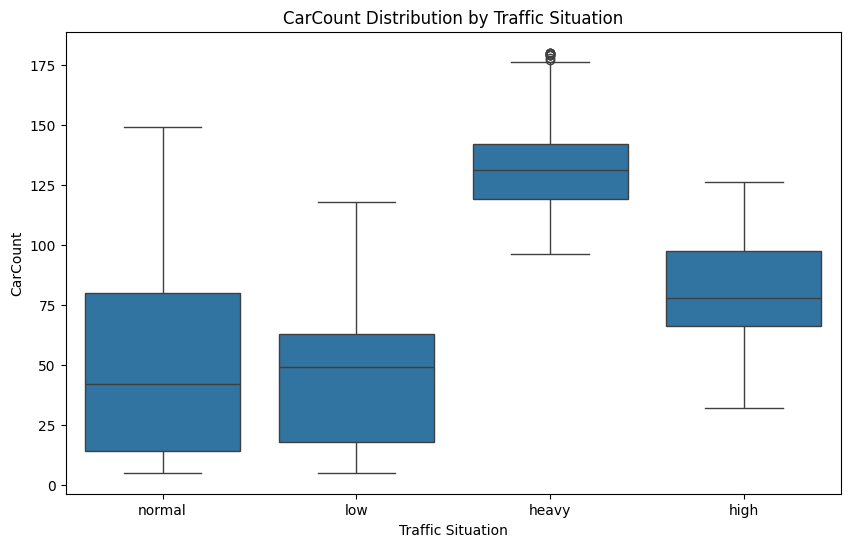

In [13]:
# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Traffic Situation', y='CarCount', data=df)
plt.title('CarCount Distribution by Traffic Situation')
plt.show()

The boxplot visualizes the distribution of 'CarCount' across different categories of 'Traffic Situation,' showing the median, quartiles, and potential outliers in the data.

<Figure size 1000x600 with 0 Axes>

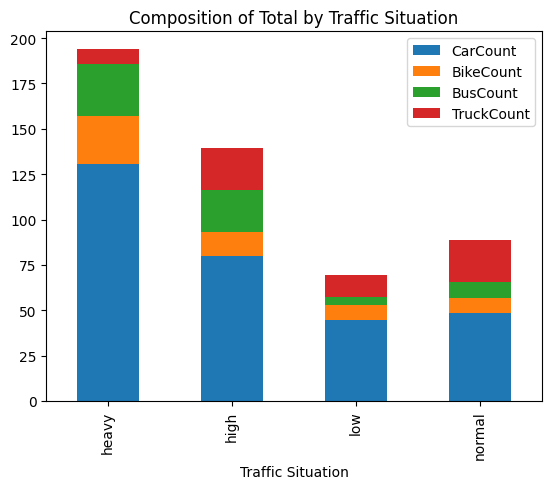

In [14]:
# Stacked Barplot
plt.figure(figsize=(10, 6))
df.groupby('Traffic Situation')[['CarCount', 'BikeCount', 'BusCount', 'TruckCount']].mean().plot(kind='bar', stacked=True)
plt.title('Composition of Total by Traffic Situation')
plt.show()


The graph is a stacked bar plot illustrating the composition of total counts of 'CarCount', 'BikeCount', 'BusCount', and 'TruckCount' by different categories of 'Traffic Situation'.

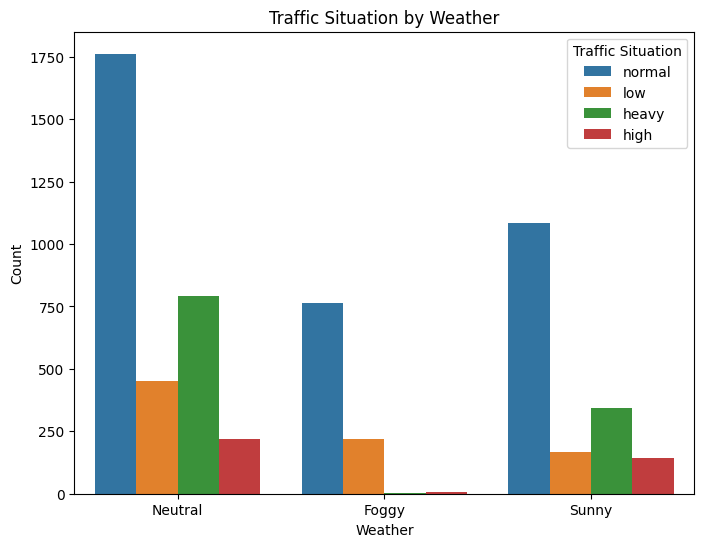

In [15]:
#traffic situation wrt weather conditions
plt.figure(figsize=(8, 6))
sns.countplot(x='Weather', hue='Traffic Situation', data=df)
plt.title('Traffic Situation by Weather')
plt.xlabel('Weather')
plt.ylabel('Count')
plt.show()

The graph is a count plot showing the distribution of 'Traffic Situation' across different weather conditions, with the highest count observed in 'Sunny' weather and the lowest in 'Foggy' weather.

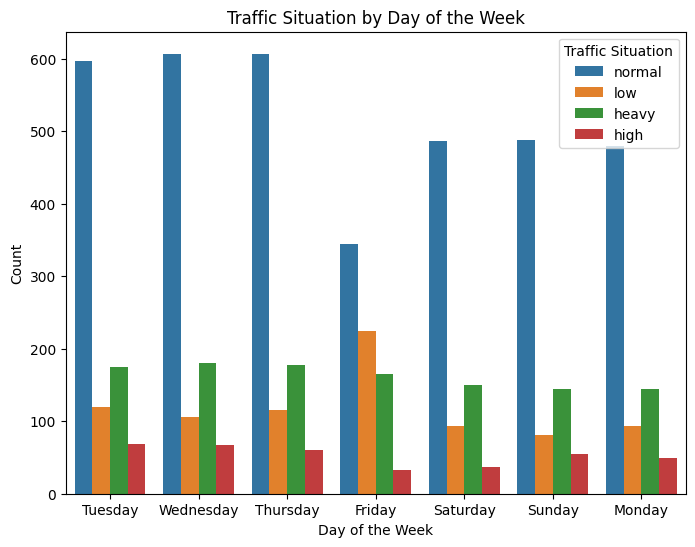

In [16]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Day of the week', hue='Traffic Situation', data=df)
plt.title('Traffic Situation by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.show()


The graph is a grouped bar plot illustrating the distribution of 'Traffic Situation' across different days of the week, with each bar representing the count of traffic situations categorized as normal, low, heavy, or high.

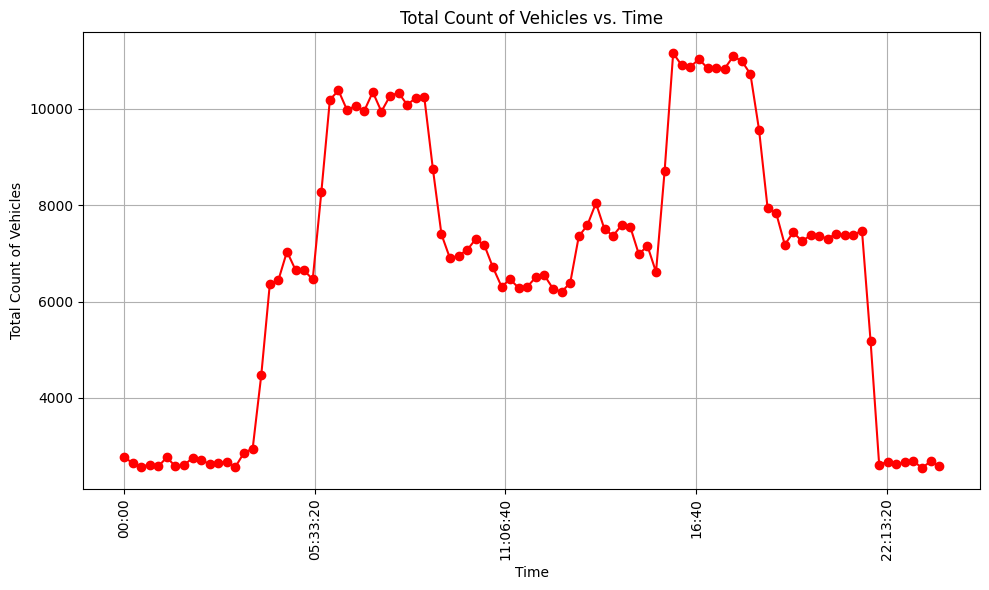

In [17]:
# Group data by 'Time' and calculate total count of vehicles
vehicle_count_by_time = df.groupby('Time')['Total'].sum()

# Plot the total count of vehicles against time periods
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
vehicle_count_by_time.plot(kind='line', marker='o', color='r')
plt.title('Total Count of Vehicles vs. Time')
plt.xlabel('Time')
plt.ylabel('Total Count of Vehicles')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.grid(True)
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

The graph displays the total count of vehicles over time, with the x-axis representing time and the y-axis showing the total count of vehicles, indicating fluctuations in vehicle counts over the specified time period.

In [18]:
df

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,Weather,Is Peak Hour
0,00:00:00,10,Tuesday,13,2,2,24,41,normal,Neutral,False
1,00:15:00,10,Tuesday,14,1,1,36,52,normal,Neutral,False
2,00:30:00,10,Tuesday,10,2,2,32,46,normal,Neutral,False
3,00:45:00,10,Tuesday,10,2,2,36,50,normal,Neutral,False
4,01:00:00,10,Tuesday,11,2,1,34,48,normal,Foggy,False
...,...,...,...,...,...,...,...,...,...,...,...
5947,22:45:00,9,Thursday,16,3,1,36,56,normal,Neutral,False
5948,23:00:00,9,Thursday,11,0,1,30,42,normal,Neutral,False
5949,23:15:00,9,Thursday,15,4,1,25,45,normal,Neutral,False
5950,23:30:00,9,Thursday,16,5,0,27,48,normal,Neutral,False


## **Dataset Preprocessing**

In [19]:
print(df.isnull().values.any()) #checking for nullvalues in dataset

False


#####**Encoding The features**




In [20]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Create a copy of the original DataFrame
df_original = df.copy()

# Perform label encoding on the original DataFrame
label_encoder = LabelEncoder()
encoded_columns = ['Day of the week', 'Weather', 'Time', 'Traffic Situation', 'Is Peak Hour']
for column in encoded_columns:
    df[column] = label_encoder.fit_transform(df[column])

# Print unique encoded values
for column in encoded_columns:
    print(f"Unique encoded values for column '{column}':")
    unique_original_values = df_original[column].unique()
    unique_encoded_values = df[column].unique()
    print(f"{unique_original_values} : {unique_encoded_values}")


Unique encoded values for column 'Day of the week':
['Tuesday' 'Wednesday' 'Thursday' 'Friday' 'Saturday' 'Sunday' 'Monday'] : [5 6 4 0 2 3 1]
Unique encoded values for column 'Weather':
['Neutral' 'Foggy' 'Sunny'] : [1 0 2]
Unique encoded values for column 'Time':
[datetime.time(0, 0) datetime.time(0, 15) datetime.time(0, 30)
 datetime.time(0, 45) datetime.time(1, 0) datetime.time(1, 15)
 datetime.time(1, 30) datetime.time(1, 45) datetime.time(2, 0)
 datetime.time(2, 15) datetime.time(2, 30) datetime.time(2, 45)
 datetime.time(3, 0) datetime.time(3, 15) datetime.time(3, 30)
 datetime.time(3, 45) datetime.time(4, 0) datetime.time(4, 15)
 datetime.time(4, 30) datetime.time(4, 45) datetime.time(5, 0)
 datetime.time(5, 15) datetime.time(5, 30) datetime.time(5, 45)
 datetime.time(6, 0) datetime.time(6, 15) datetime.time(6, 30)
 datetime.time(6, 45) datetime.time(7, 0) datetime.time(7, 15)
 datetime.time(7, 30) datetime.time(7, 45) datetime.time(8, 0)
 datetime.time(8, 15) datetime.time(8, 

In [21]:
df.dtypes

Time                 int32
Date                 int64
Day of the week      int32
CarCount             int64
BikeCount            int64
BusCount             int64
TruckCount           int64
Total                int64
Traffic Situation    int32
Weather              int32
Is Peak Hour         int64
dtype: object

In [22]:
df

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,Weather,Is Peak Hour
0,0,10,5,13,2,2,24,41,3,1,0
1,1,10,5,14,1,1,36,52,3,1,0
2,2,10,5,10,2,2,32,46,3,1,0
3,3,10,5,10,2,2,36,50,3,1,0
4,4,10,5,11,2,1,34,48,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...
5947,91,9,4,16,3,1,36,56,3,1,0
5948,92,9,4,11,0,1,30,42,3,1,0
5949,93,9,4,15,4,1,25,45,3,1,0
5950,94,9,4,16,5,0,27,48,3,1,0


### **Scaling the features**

In [ ]:
# # Scale the features
# from sklearn.preprocessing import MinMaxScaler
# # Separate features (X) and target variable (Y)
# X = df.drop(columns=['Traffic Situation'])
# Y = df['Traffic Situation']
# # Normalize the numeric features using MinMaxScaler
# numeric_columns = ['CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Total']
# scaler = MinMaxScaler()
# X[numeric_columns] = scaler.fit_transform(X[numeric_columns])

In [ ]:
# # Concatenate the features and target variable
# normalized_encoded_data = pd.concat([X, pd.Series(Y, name='Traffic Situation')], axis=1)

In [ ]:
# traffic_df = normalized_encoded_data
# traffic_df

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Weather,Is Peak Hour,Traffic Situation
0,0,10,5,0.045714,0.028571,0.04,0.400000,0.077519,1,0,3
1,1,10,5,0.051429,0.014286,0.02,0.600000,0.120155,1,0,3
2,2,10,5,0.028571,0.028571,0.04,0.533333,0.096899,1,0,3
3,3,10,5,0.028571,0.028571,0.04,0.600000,0.112403,1,0,3
4,4,10,5,0.034286,0.028571,0.02,0.566667,0.104651,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...
5947,91,9,4,0.062857,0.042857,0.02,0.600000,0.135659,1,0,3
5948,92,9,4,0.034286,0.000000,0.02,0.500000,0.081395,1,0,3
5949,93,9,4,0.057143,0.057143,0.02,0.416667,0.093023,1,0,3
5950,94,9,4,0.062857,0.071429,0.00,0.450000,0.104651,1,0,3


In [ ]:
# from sklearn.preprocessing import StandardScaler
# sc_X = StandardScaler()
# X_train = sc_X.fit_transform(X_train)
# X_test= sc_X.fit_transform(X_test)

### **SPLIT DATASET**

---




In [23]:
from sklearn.model_selection import train_test_split
X = df.drop('Traffic Situation', axis=1)
y = df['Traffic Situation']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4166, 10), (1786, 10), (4166,), (1786,))

### **FEATURE SELECTION**


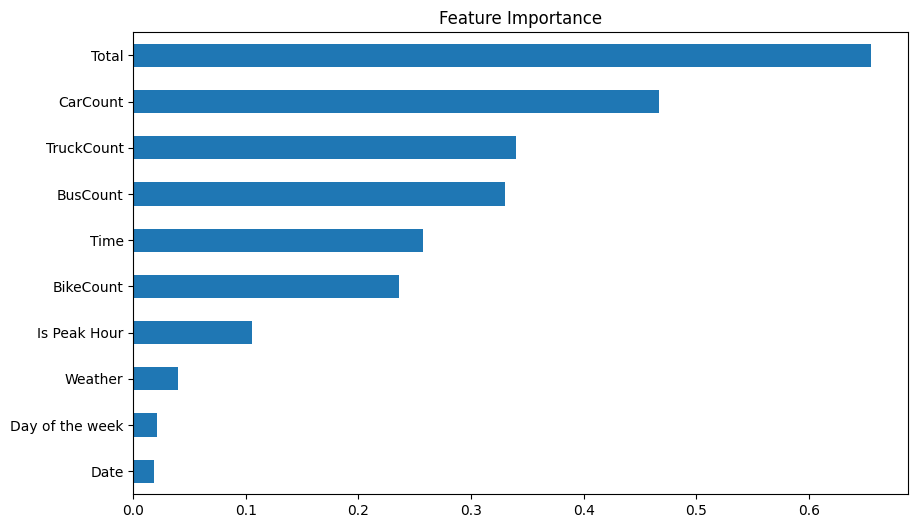

In [24]:

from sklearn.feature_selection import mutual_info_classif

importances = mutual_info_classif(X_train, y_train)
feature_importances = pd.Series(importances, index=X_train.columns)
# Visualize feature importances if needed
plt.figure(figsize=(10, 6))
feature_importances.sort_values().plot(kind='barh')
plt.title('Feature Importance')
plt.show()
#Shows the 'Date' column has the least feature importance

In [25]:
# Drop the 'Date' column from both training and testing sets
X_train.drop(columns=['Date'], inplace=True)
X_test.drop(columns=['Date'], inplace=True)
X.drop(columns=['Date'], inplace=True)

In [26]:
y_train

744     0
2077    3
5508    0
1375    0
3800    1
       ..
3772    0
5191    2
5226    3
5390    3
860     3
Name: Traffic Situation, Length: 4166, dtype: int32

In [27]:
X_train

,Time,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Weather,Is Peak Hour
744,72,5,101,30,23,18,172,1,1
2077,61,5,97,2,5,18,122,1,1
5508,36,3,128,16,34,0,178,2,1
1375,31,5,135,30,17,10,192,1,1
3800,56,6,96,22,36,5,159,2,0
...,...,...,...,...,...,...,...,...,...
3772,28,6,141,15,21,5,182,1,1
5191,7,4,11,0,0,16,27,0,0
5226,42,4,77,23,14,20,134,2,0
5390,14,2,19,5,1,38,63,0,0


## **MODELS**

---



In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import pandas as pd



# 1.  **Decision Tree**






In [30]:

# Decision Tree
print("\nDecision Tree:")
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
Y_pred_dt = dt_model.predict(X_test)
accuracy_dt = accuracy_score(y_test, Y_pred_dt)
mse_dt = mean_squared_error(y_test, Y_pred_dt)
rmse_dt = mean_squared_error(y_test, Y_pred_dt, squared=False)
mae_dt = mean_absolute_error(y_test, Y_pred_dt)
r2_dt = r2_score(y_test, Y_pred_dt)
print("Accuracy:", accuracy_dt)
print("MSE:", mse_dt)
print("RMSE:", rmse_dt)
print("MAE:", mae_dt)
print("R2 Score:", r2_dt)


Decision Tree:
Accuracy: 0.9988801791713325
MSE: 0.004479283314669653
RMSE: 0.06692744814102547
MAE: 0.0022396416573348264
R2 Score: 0.9968108367268043


# 2.  **k-Nearest Neighbors (KNN)**


In [31]:
# k-Nearest Neighbors (KNN)
print("\nk-Nearest Neighbors:")
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
Y_pred_knn = knn_model.predict(X_test)
accuracy_knn = accuracy_score(y_test, Y_pred_knn)
mse_knn = mean_squared_error(y_test, Y_pred_knn)
rmse_knn = mean_squared_error(y_test, Y_pred_knn, squared=False)
mae_knn = mean_absolute_error(y_test, Y_pred_knn)
r2_knn = r2_score(y_test, Y_pred_knn)
print("Accuracy:", accuracy_knn)
print("MSE:", mse_knn)
print("RMSE:", rmse_knn)
print("MAE:", mae_knn)
print("R2 Score:", r2_knn)


k-Nearest Neighbors:
Accuracy: 0.9585666293393057
MSE: 0.1103023516237402
RMSE: 0.3321179784711153
MAE: 0.06215005599104143
R2 Score: 0.9214668543975544


# 3. **Multiple Linear Regression**

In [32]:
# Multiple Linear Regression
print("\nMultiple Linear Regression:")
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
Y_pred_lr = lr_model.predict(X_test)
accuracy_lr = lr_model.score(X_test, y_test)
mse_lr = mean_squared_error(y_test, Y_pred_lr)
rmse_lr = mean_squared_error(y_test, Y_pred_lr, squared=False)
mae_lr = mean_absolute_error(y_test, Y_pred_lr)
r2_lr = r2_score(y_test, Y_pred_lr)
print("Accuracy:", accuracy_lr)
print("MSE:", mse_lr)
print("RMSE:", rmse_lr)
print("MAE:", mae_lr)
print("R2 Score:", r2_lr)


Multiple Linear Regression:
Accuracy: 0.5381593478899283
MSE: 0.6486701839381844
RMSE: 0.8054006356703379
MAE: 0.645993866645079
R2 Score: 0.5381593478899283


# 4. **Random Forest**

In [33]:
# Random Forest
print("\nRandom Forest:")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
Y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, Y_pred_rf)
mse_rf = mean_squared_error(y_test, Y_pred_rf)
rmse_rf = mean_squared_error(y_test, Y_pred_rf, squared=False)
mae_rf = mean_absolute_error(y_test, Y_pred_rf)
r2_rf = r2_score(y_test, Y_pred_rf)
print("Accuracy:", accuracy_rf)
print("MSE:", mse_rf)
print("RMSE:", rmse_rf)
print("MAE:", mae_rf)
print("R2 Score:", r2_rf)


Random Forest:
Accuracy: 0.9966405375139977
MSE: 0.012877939529675251
RMSE: 0.11348100955523462
MAE: 0.006159014557670772
R2 Score: 0.9908311555895621


# **MODEL COMPARISON**

---



In [35]:
# Model Comparison
print("\nModel Comparison:")
models = ['Decision Tree', 'k-Nearest Neighbors', 'Multiple Linear Regression', 'Random Forest']
accuracies = [accuracy_dt, accuracy_knn, accuracy_lr, accuracy_rf]
mses = [mse_dt, mse_knn, mse_lr, mse_rf]
rmses = [rmse_dt, rmse_knn, rmse_lr, rmse_rf]
maes = [mae_dt, mae_knn, mae_lr, mae_rf]
r2_scores = [r2_dt, r2_knn, r2_lr, r2_rf]

# Find the model with the highest accuracy
best_model_index = accuracies.index(max(accuracies))
best_model = models[best_model_index]

# Print results
for i in range(len(models)):
    print("\n{}:".format(models[i]))
    print("Accuracy:", accuracies[i])
    print("MSE:", mses[i])
    print("RMSE:", rmses[i])
    print("MAE:", maes[i])
    print("R2 Score:", r2_scores[i])

print("\n{} has the highest accuracy.".format(best_model))


Model Comparison:

Decision Tree:
Accuracy: 0.9988801791713325
MSE: 0.004479283314669653
RMSE: 0.06692744814102547
MAE: 0.0022396416573348264
R2 Score: 0.9968108367268043

k-Nearest Neighbors:
Accuracy: 0.9585666293393057
MSE: 0.1103023516237402
RMSE: 0.3321179784711153
MAE: 0.06215005599104143
R2 Score: 0.9214668543975544

Multiple Linear Regression:
Accuracy: 0.5381593478899283
MSE: 0.6486701839381844
RMSE: 0.8054006356703379
MAE: 0.645993866645079
R2 Score: 0.5381593478899283

Random Forest:
Accuracy: 0.9966405375139977
MSE: 0.012877939529675251
RMSE: 0.11348100955523462
MAE: 0.006159014557670772
R2 Score: 0.9908311555895621

Decision Tree has the highest accuracy.


# **Visualization**

---



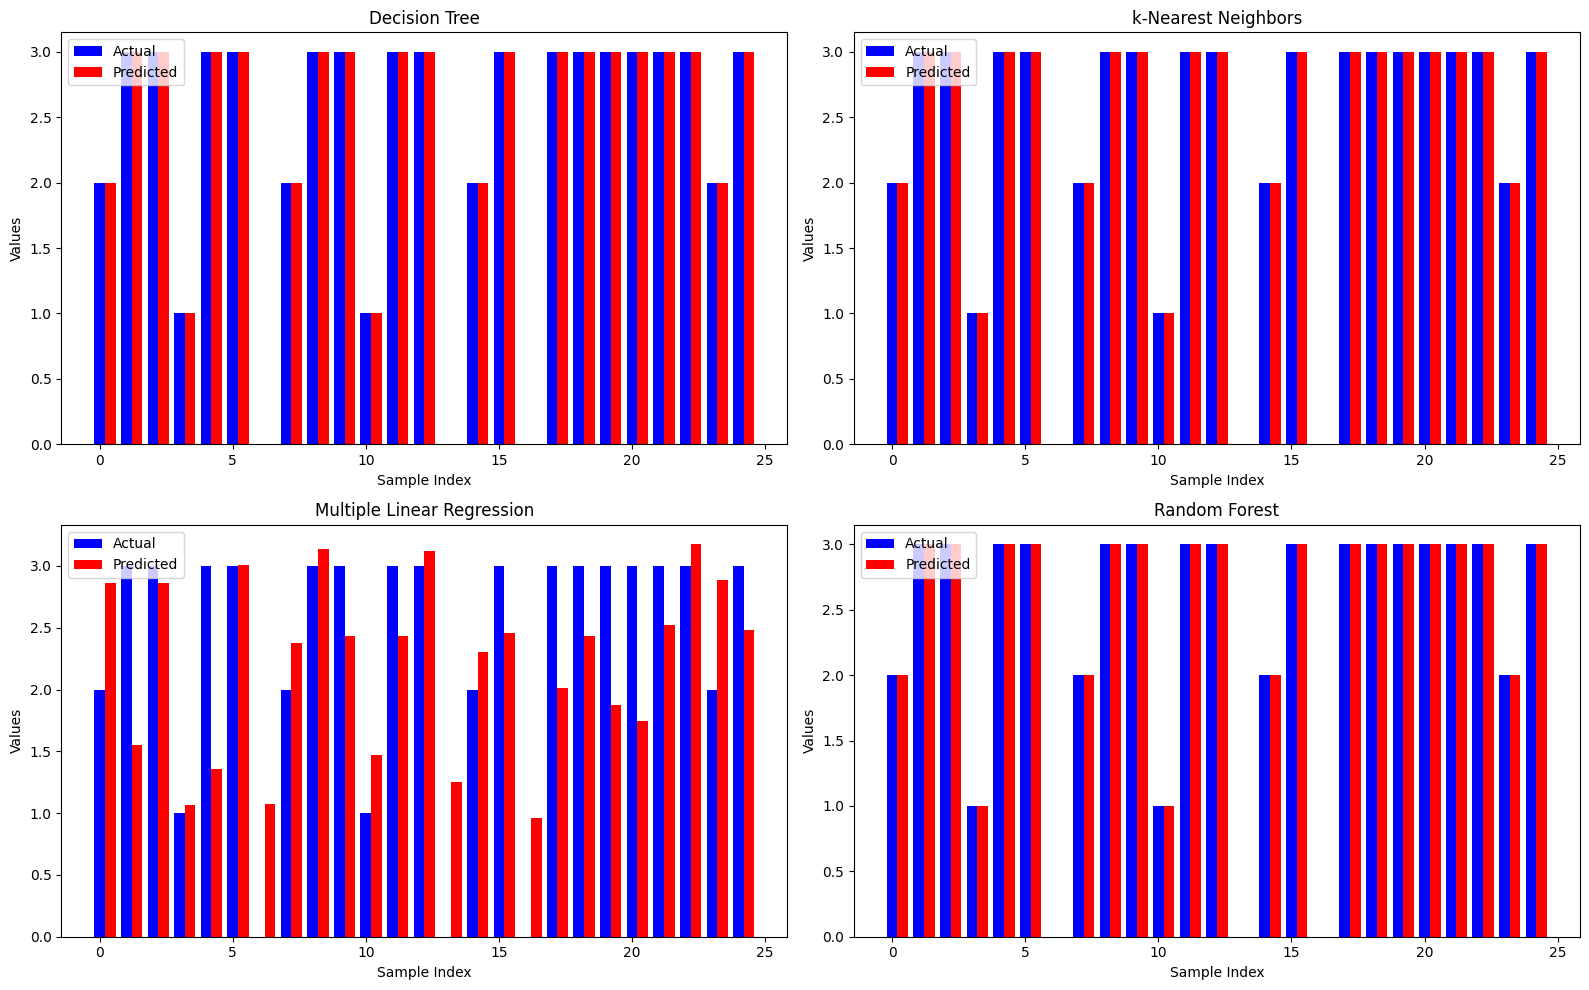

In [36]:
# Creating a DataFrame for each model's actual and predicted values
df_dt = pd.DataFrame({'Actual': y_test.to_numpy().flatten(), 'Predicted': Y_pred_dt.flatten()})
df_knn = pd.DataFrame({'Actual': y_test.to_numpy().flatten(), 'Predicted': Y_pred_knn.flatten()})
df_lr = pd.DataFrame({'Actual': y_test.to_numpy().flatten(), 'Predicted': Y_pred_lr.flatten()})
df_rf = pd.DataFrame({'Actual': y_test.to_numpy().flatten(), 'Predicted': Y_pred_rf.flatten()})

# Took the first 25 rows for visualization
df_dt = df_dt.head(25)
df_knn = df_knn.head(25)
df_lr = df_lr.head(25)
df_rf = df_rf.head(25)

# Plot for Decision Tree
plt.figure(figsize=(16, 10))
plt.subplot(2, 2, 1)
plt.bar(df_dt.index, df_dt['Actual'], width=0.4, label='Actual', color='b')
plt.bar(df_dt.index + 0.4, df_dt['Predicted'], width=0.4, label='Predicted', color='r')
plt.title('Decision Tree')
plt.xlabel('Sample Index')
plt.ylabel('Values')
plt.legend()

# Plot for k-Nearest Neighbors
plt.subplot(2, 2, 2)
plt.bar(df_knn.index, df_knn['Actual'], width=0.4, label='Actual', color='b')
plt.bar(df_knn.index + 0.4, df_knn['Predicted'], width=0.4, label='Predicted', color='r')
plt.title('k-Nearest Neighbors')
plt.xlabel('Sample Index')
plt.ylabel('Values')
plt.legend()

# Plot for Multiple Linear Regression
plt.subplot(2, 2, 3)
plt.bar(df_lr.index, df_lr['Actual'], width=0.4, label='Actual', color='b')
plt.bar(df_lr.index + 0.4, df_lr['Predicted'], width=0.4, label='Predicted', color='r')
plt.title('Multiple Linear Regression')
plt.xlabel('Sample Index')
plt.ylabel('Values')
plt.legend()

# Plot for Random Forest
plt.subplot(2, 2, 4)
plt.bar(df_rf.index, df_rf['Actual'], width=0.4, label='Actual', color='b')
plt.bar(df_rf.index + 0.4, df_rf['Predicted'], width=0.4, label='Predicted', color='r')
plt.title('Random Forest')
plt.xlabel('Sample Index')
plt.ylabel('Values')
plt.legend()

plt.tight_layout()
plt.show()


# **PREDICTIONS**

In [37]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
# # Make predictions on the test set
# y_pred = dt_model1.predict(features)
# # Print the entire y_pred array
# print(y_pred)


In [38]:
y_pred = model.predict(X_test)

In [40]:
print(y_pred)

[2 3 3 ... 3 3 3]


In [41]:
def plot_confusion_matrix(confusion_matrix, classes):

    plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = confusion_matrix.max() / 2.
    for i in range(confusion_matrix.shape[0]):
        for j in range(confusion_matrix.shape[1]):
            plt.text(j, i, format(confusion_matrix[i, j], fmt),
                     ha="center", va="center",
                     color="white" if confusion_matrix[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

    # Show the plot
    plt.show()


In [42]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[ 333,    0,    0,    0],
       [   0,  121,    0,    1],
       [   0,    0,  216,    1],
       [   0,    1,    0, 1113]], dtype=int64)

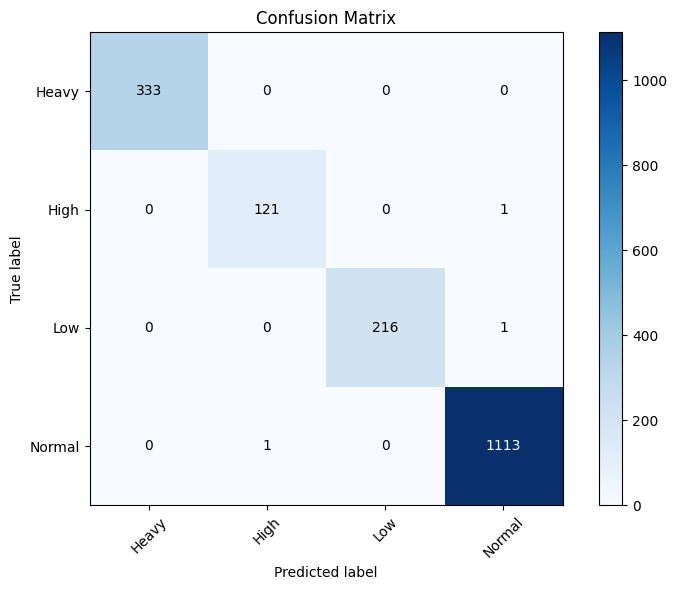

In [43]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
plot_confusion_matrix(cm, classes=['Heavy', 'High', 'Low', 'Normal'])
plt.show()

# **Saving the trained model**

In [45]:
import pickle
import numpy as np
with open ("trained_model.pkl",'wb') as modelfile:
  pickle.dump(dt_model,modelfile)

Sample Prediction

In [64]:

import pickle
import numpy as np
import datetime

# Load the trained model
loaded_model = pickle.load(open('trained_model.pkl', 'rb'))

def preprocess_input(weekday, weather, time, is_peak_hour, car_count, bike_count, bus_count, truck_count):
    weekday_mapping = {'Monday': 1, 'Tuesday': 5, 'Wednesday': 6, 'Thursday': 4, 'Friday':0, 'Saturday': 3, 'Sunday': 2}
    weather_mapping = {'Sunny': 2, 'Neutral': 1, 'Foggy': 0}
    is_peak_hour_mapping = {False: 0, True: 1}
    
    encoded_weekday = weekday_mapping.get(weekday)
    encoded_weather = weather_mapping.get(weather)
    
    time_mapping = {
        datetime.time(0, 0): 0, datetime.time(0, 15): 1, datetime.time(0, 30): 2, datetime.time(0, 45): 3,
        datetime.time(1, 0): 4, datetime.time(1, 15): 5, datetime.time(1, 30): 6, datetime.time(1, 45): 7,
        datetime.time(2, 0): 8, datetime.time(2, 15): 9, datetime.time(2, 30): 10, datetime.time(2, 45): 11,
        datetime.time(3, 0): 12, datetime.time(3, 15): 13, datetime.time(3, 30): 14, datetime.time(3, 45): 15,
        datetime.time(4, 0): 16, datetime.time(4, 15): 17, datetime.time(4, 30): 18, datetime.time(4, 45): 19,
        datetime.time(5, 0): 20, datetime.time(5, 15): 21, datetime.time(5, 30): 22, datetime.time(5, 45): 23,
        datetime.time(6, 0): 24, datetime.time(6, 15): 25, datetime.time(6, 30): 26, datetime.time(6, 45): 27,
        datetime.time(7, 0): 28, datetime.time(7, 15): 29, datetime.time(7, 30): 30, datetime.time(7, 45): 31,
        datetime.time(8, 0): 32, datetime.time(8, 15): 33, datetime.time(8, 30): 34, datetime.time(8, 45): 35,
        datetime.time(9, 0): 36, datetime.time(9, 15): 37, datetime.time(9, 30): 38, datetime.time(9, 45): 39,
        datetime.time(10, 0): 40, datetime.time(10, 15): 41, datetime.time(10, 30): 42, datetime.time(10, 45): 43,
        datetime.time(11, 0): 44, datetime.time(11, 15): 45, datetime.time(11, 30): 46, datetime.time(11, 45): 47,
        datetime.time(12, 0): 48, datetime.time(12, 15): 49, datetime.time(12, 30): 50, datetime.time(12, 45): 51,
        datetime.time(13, 0): 52, datetime.time(13, 15): 53, datetime.time(13, 30): 54, datetime.time(13, 45): 55,
        datetime.time(14, 0): 56, datetime.time(14, 15): 57, datetime.time(14, 30): 58, datetime.time(14, 45): 59,
        datetime.time(15, 0): 60, datetime.time(15, 15): 61, datetime.time(15, 30): 62, datetime.time(15, 45): 63,
        datetime.time(16, 0): 64, datetime.time(16, 15): 65, datetime.time(16, 30): 66, datetime.time(16, 45): 67,
        datetime.time(17, 0): 68, datetime.time(17, 15): 69, datetime.time(17, 30): 70, datetime.time(17, 45): 71,
        datetime.time(18, 0): 72, datetime.time(18, 15): 73, datetime.time(18, 30): 74, datetime.time(18, 45): 75,
        datetime.time(19, 0): 76, datetime.time(19, 15): 77, datetime.time(19, 30): 78, datetime.time(19, 45): 79,
        datetime.time(20, 0): 80, datetime.time(20, 15): 81, datetime.time(20, 30): 82, datetime.time(20, 45): 83,
        datetime.time(21, 0): 84, datetime.time(21, 15): 85, datetime.time(21, 30): 86, datetime.time(21, 45): 87,
        datetime.time(22, 0): 88, datetime.time(22, 15): 89, datetime.time(22, 30): 90, datetime.time(22, 45): 91,
        datetime.time(23, 0): 92, datetime.time(23, 15): 93, datetime.time(23, 30): 94, datetime.time(23, 45): 95
    }
    
    encoded_time = time_mapping.get(time)
    
    encoded_is_peak_hour = is_peak_hour_mapping.get(is_peak_hour)
    
    total = car_count + bike_count + bus_count + truck_count
    
    return [encoded_weekday, encoded_weather, encoded_time, encoded_is_peak_hour, car_count, bike_count, bus_count, truck_count, total]

# Function to predict traffic situation
def predict_traffic(weekday, weather, time, is_peak_hour, car_count, bike_count, bus_count, truck_count):
    # Preprocess input data
    input_data = preprocess_input(weekday, weather, time, is_peak_hour, car_count, bike_count, bus_count, truck_count)
    
    # Make prediction
    prediction = loaded_model.predict([input_data])[0]
    
    # Decode the prediction
    traffic_situation_mapping = {2: 'low', 0: 'heavy', 1: 'high', 3: 'normal'}
    traffic_situation = traffic_situation_mapping.get(prediction)
    
    return traffic_situation

    
    return traffic_situation

predict_traffic('Tuesday','Neutral',datetime.time(0, 0),'True',13,2,2,24)

'low'